# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

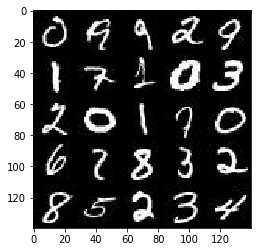

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

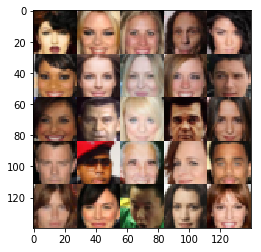

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learing_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    '''
    n_units = 10
    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Hidden layer
        h1 = tf.reshape(images, (-1, 28*28*1))
        
        h1 = tf.layers.dense(h1, n_units, activation=None)
        # Leaky ReLU
        h1 = tf.maximum(alpha * h1, h1)
        
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits)
        

    
    return out, logits
    '''
    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #print(relu1.shape)
        # 16x16x32
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #print(relu2.shape)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #print(relu3.shape)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        #print(flat.shape)
        logits = tf.layers.dense(flat, 1)
        #print(logits.shape)
        out = tf.sigmoid(logits)
        #print(out.shape)
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
'''
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.1
    with tf.variable_scope('generator', reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        print(x1.shape)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        print(x1.shape)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        print(x2.shape)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        print(x3.shape)
        # 16x16x128 now
        
        print(out_channel_dim)
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        print(logits.shape)
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out
    
    
    with tf.variable_scope("generator", reuse=not is_train) as scope:
        fc1 = tf.layers.dense(z, 7*7*256)
        # Reshape
        x1 = tf.reshape(fc1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)

        # Second layer 
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)

        # Ouput layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='SAME')
        out = tf.tanh(logits)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)
'''

'\ndef generator(z, out_channel_dim, is_train=True):\n    """\n    Create the generator network\n    :param z: Input z\n    :param out_channel_dim: The number of channels in the output image\n    :param is_train: Boolean if generator is being used for training\n    :return: The tensor output of the generator\n    """\n    alpha = 0.1\n    with tf.variable_scope(\'generator\', reuse = not is_train):\n        # First fully connected layer\n        x1 = tf.layers.dense(z, 4*4*512)\n        print(x1.shape)\n        # Reshape it to start the convolutional stack\n        x1 = tf.reshape(x1, (-1, 4, 4, 512))\n        x1 = tf.layers.batch_normalization(x1, training=is_train)\n        x1 = tf.maximum(alpha * x1, x1)\n        \n        print(x1.shape)\n        # 4x4x512 now\n        \n        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding=\'same\')\n        x2 = tf.layers.batch_normalization(x2, training=is_train)\n        x2 = tf.maximum(alpha * x2, x2)\n        \n        print(

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope("generator", reuse=not is_train) as scope:
        fc1 = tf.layers.dense(z, 7*7*256)
        #print(fc1.shape)
        # Reshape
        x1 = tf.reshape(fc1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.nn.relu(x1)
        #print(x1.shape)
        # Second layer 
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)
        #print(x2.shape)
        # Ouput layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='SAME')
        #print(logits.shape)
        out = tf.tanh(logits)
        #print(out.shape)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """

    smooth = 0.1
    # Build the model
    g_model = generator(input_z, out_channel_dim)
    # g_model is the generator output

    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    # Calculate losses
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_logits_fake)))

    return d_loss, g_loss

'''
# Build the model
g_model = generator(input_z, input_size)
# g_model is the generator output

d_model_real, d_logits_real = discriminator(input_real)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
# Calculate losses
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * (1 - smooth)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_real)))
d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_logits_fake)))
'''

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """

    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [ ]:
def train(epoch_count, batch_size, z_dim, learning_rate_scalar, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    if(data_image_mode == 'RGB'):
        out_dim = 3
    else:
        out_dim = 1
    
    
    #saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0

    # Inputs
    input_real, input_z, learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    # Optimizers
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    print_every = 10
    show_every = 50
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1

                #Step 1. Random Noise to feed into G
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim))

                #Step 2. Run Optimizers
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z: batch_z, learning_rate: learning_rate_scalar})
                _ = sess.run(g_opt, feed_dict={input_z:batch_z, input_real: batch_images, learning_rate: learning_rate_scalar})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_z = tf.random_uniform(minval=-1, maxval=1, shape=(25,z_dim),dtype=tf.float32)
                    show_generator_output(sess, 25, show_z, data_shape[3], data_image_mode)


        #saver.save(sess, './checkpoints/generator.ckpt')

    #with open('samples.pkl', 'wb') as f:
    #    pkl.dump(samples, f)

    return losses, samples

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0748... Generator Loss: 2.7798
Epoch 1/2... Discriminator Loss: 1.6556... Generator Loss: 0.4492
Epoch 1/2... Discriminator Loss: 1.1922... Generator Loss: 0.8962
Epoch 1/2... Discriminator Loss: 0.7439... Generator Loss: 2.2108
Epoch 1/2... Discriminator Loss: 0.8331... Generator Loss: 2.2675


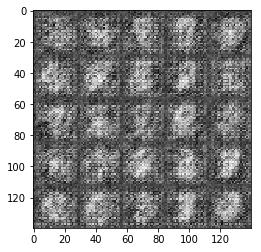

Epoch 1/2... Discriminator Loss: 1.2504... Generator Loss: 0.6998
Epoch 1/2... Discriminator Loss: 0.8475... Generator Loss: 1.2236
Epoch 1/2... Discriminator Loss: 1.0484... Generator Loss: 0.9571
Epoch 1/2... Discriminator Loss: 0.8623... Generator Loss: 1.3046
Epoch 1/2... Discriminator Loss: 1.5567... Generator Loss: 0.3968


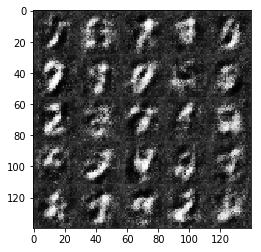

Epoch 1/2... Discriminator Loss: 1.0133... Generator Loss: 2.5087
Epoch 1/2... Discriminator Loss: 1.2741... Generator Loss: 0.6144
Epoch 1/2... Discriminator Loss: 0.9002... Generator Loss: 1.0190
Epoch 1/2... Discriminator Loss: 1.1361... Generator Loss: 0.7025
Epoch 1/2... Discriminator Loss: 1.8147... Generator Loss: 0.3380


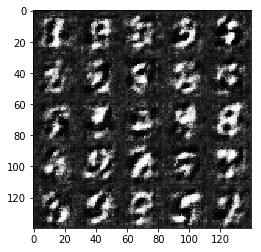

Epoch 1/2... Discriminator Loss: 1.0797... Generator Loss: 0.7501
Epoch 1/2... Discriminator Loss: 0.7798... Generator Loss: 2.7271
Epoch 1/2... Discriminator Loss: 0.6825... Generator Loss: 1.8764
Epoch 1/2... Discriminator Loss: 0.9279... Generator Loss: 3.9035
Epoch 1/2... Discriminator Loss: 0.5358... Generator Loss: 1.9769


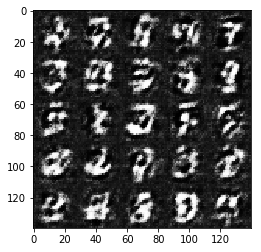

Epoch 1/2... Discriminator Loss: 0.5344... Generator Loss: 2.1776
Epoch 1/2... Discriminator Loss: 0.5671... Generator Loss: 3.1611
Epoch 1/2... Discriminator Loss: 0.6277... Generator Loss: 1.5482
Epoch 1/2... Discriminator Loss: 0.5917... Generator Loss: 1.6156
Epoch 1/2... Discriminator Loss: 0.4456... Generator Loss: 3.0698


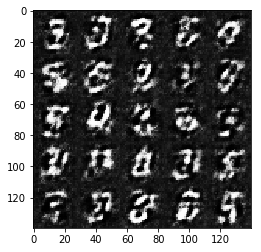

Epoch 1/2... Discriminator Loss: 0.4391... Generator Loss: 2.7077
Epoch 1/2... Discriminator Loss: 0.8786... Generator Loss: 1.0577
Epoch 1/2... Discriminator Loss: 0.6753... Generator Loss: 4.7167
Epoch 1/2... Discriminator Loss: 0.5041... Generator Loss: 2.4021
Epoch 1/2... Discriminator Loss: 0.6808... Generator Loss: 1.3255


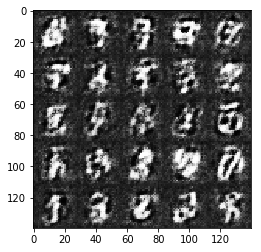

Epoch 1/2... Discriminator Loss: 0.4350... Generator Loss: 2.6252
Epoch 1/2... Discriminator Loss: 0.3744... Generator Loss: 3.4957
Epoch 1/2... Discriminator Loss: 3.1258... Generator Loss: 7.9832
Epoch 1/2... Discriminator Loss: 0.5950... Generator Loss: 1.7434
Epoch 1/2... Discriminator Loss: 0.4163... Generator Loss: 2.8812


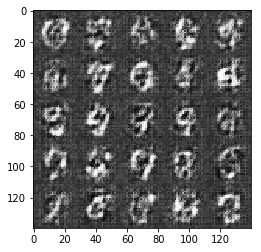

Epoch 1/2... Discriminator Loss: 0.6314... Generator Loss: 1.4991
Epoch 1/2... Discriminator Loss: 0.6811... Generator Loss: 4.8048
Epoch 1/2... Discriminator Loss: 0.5037... Generator Loss: 2.1712
Epoch 1/2... Discriminator Loss: 0.4670... Generator Loss: 2.3959
Epoch 1/2... Discriminator Loss: 0.3819... Generator Loss: 3.5357


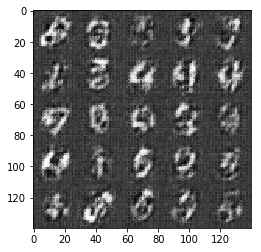

Epoch 1/2... Discriminator Loss: 1.5577... Generator Loss: 0.4510
Epoch 1/2... Discriminator Loss: 1.1790... Generator Loss: 0.6792
Epoch 1/2... Discriminator Loss: 0.4932... Generator Loss: 2.1948
Epoch 1/2... Discriminator Loss: 0.3757... Generator Loss: 3.4638
Epoch 1/2... Discriminator Loss: 0.4506... Generator Loss: 2.5556


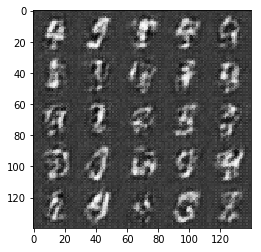

Epoch 1/2... Discriminator Loss: 1.1640... Generator Loss: 3.4793
Epoch 1/2... Discriminator Loss: 0.4703... Generator Loss: 2.3945
Epoch 1/2... Discriminator Loss: 0.6235... Generator Loss: 1.5570
Epoch 1/2... Discriminator Loss: 0.4433... Generator Loss: 2.4996
Epoch 1/2... Discriminator Loss: 0.4637... Generator Loss: 2.3656


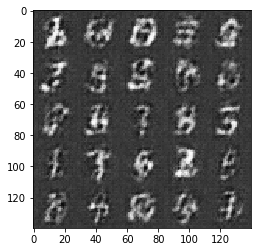

Epoch 1/2... Discriminator Loss: 0.4195... Generator Loss: 2.8288
Epoch 1/2... Discriminator Loss: 1.4765... Generator Loss: 0.5711
Epoch 1/2... Discriminator Loss: 0.5664... Generator Loss: 1.9108
Epoch 1/2... Discriminator Loss: 0.5028... Generator Loss: 2.1586
Epoch 1/2... Discriminator Loss: 0.5378... Generator Loss: 1.8403


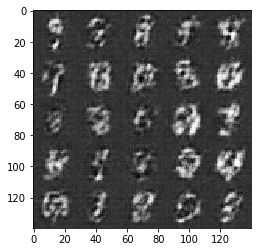

Epoch 1/2... Discriminator Loss: 0.5073... Generator Loss: 2.0963
Epoch 1/2... Discriminator Loss: 0.5380... Generator Loss: 1.8838
Epoch 1/2... Discriminator Loss: 0.5112... Generator Loss: 2.1639
Epoch 1/2... Discriminator Loss: 0.4252... Generator Loss: 2.6256
Epoch 1/2... Discriminator Loss: 0.6448... Generator Loss: 1.5256


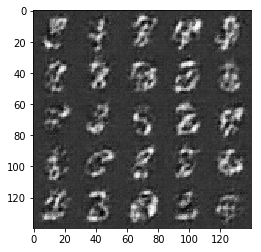

Epoch 1/2... Discriminator Loss: 0.4881... Generator Loss: 2.2357
Epoch 1/2... Discriminator Loss: 0.4604... Generator Loss: 2.4268
Epoch 1/2... Discriminator Loss: 0.6134... Generator Loss: 1.6497
Epoch 1/2... Discriminator Loss: 0.4254... Generator Loss: 2.6213
Epoch 1/2... Discriminator Loss: 0.4425... Generator Loss: 2.4183


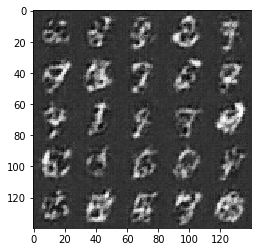

Epoch 1/2... Discriminator Loss: 0.4151... Generator Loss: 2.8181
Epoch 1/2... Discriminator Loss: 0.4256... Generator Loss: 2.7287
Epoch 1/2... Discriminator Loss: 0.4060... Generator Loss: 3.0481
Epoch 1/2... Discriminator Loss: 3.2122... Generator Loss: 6.4200
Epoch 1/2... Discriminator Loss: 0.6556... Generator Loss: 1.6421


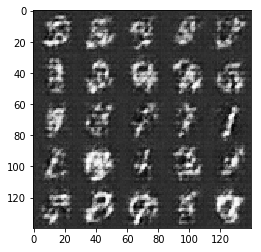

Epoch 1/2... Discriminator Loss: 0.6924... Generator Loss: 1.3866
Epoch 1/2... Discriminator Loss: 0.5266... Generator Loss: 1.9473
Epoch 1/2... Discriminator Loss: 0.7554... Generator Loss: 1.1989
Epoch 1/2... Discriminator Loss: 0.5121... Generator Loss: 2.1101
Epoch 1/2... Discriminator Loss: 0.5197... Generator Loss: 1.9493


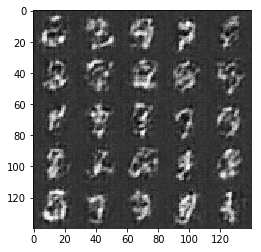

Epoch 1/2... Discriminator Loss: 0.5441... Generator Loss: 1.8090
Epoch 1/2... Discriminator Loss: 0.5036... Generator Loss: 2.0635
Epoch 1/2... Discriminator Loss: 0.5497... Generator Loss: 1.8812
Epoch 1/2... Discriminator Loss: 0.4283... Generator Loss: 2.5938
Epoch 1/2... Discriminator Loss: 0.5524... Generator Loss: 1.8040


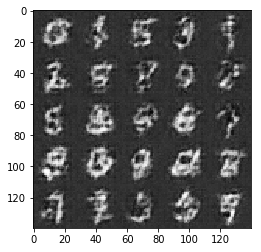

Epoch 1/2... Discriminator Loss: 0.6046... Generator Loss: 1.5762
Epoch 1/2... Discriminator Loss: 0.4649... Generator Loss: 2.2935
Epoch 1/2... Discriminator Loss: 0.5693... Generator Loss: 1.6816
Epoch 1/2... Discriminator Loss: 0.4427... Generator Loss: 2.4652
Epoch 1/2... Discriminator Loss: 0.4254... Generator Loss: 3.1086


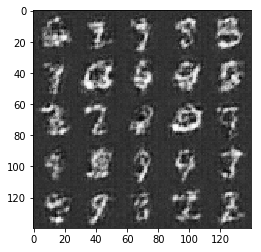

Epoch 1/2... Discriminator Loss: 0.6196... Generator Loss: 1.5368
Epoch 1/2... Discriminator Loss: 0.4402... Generator Loss: 2.5026
Epoch 1/2... Discriminator Loss: 1.1752... Generator Loss: 0.6787
Epoch 1/2... Discriminator Loss: 0.5267... Generator Loss: 1.8863
Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 1.8892


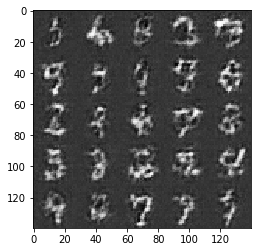

Epoch 1/2... Discriminator Loss: 0.4646... Generator Loss: 2.2533
Epoch 1/2... Discriminator Loss: 1.1541... Generator Loss: 0.7510
Epoch 1/2... Discriminator Loss: 0.4570... Generator Loss: 2.2670
Epoch 1/2... Discriminator Loss: 0.7915... Generator Loss: 1.1577
Epoch 1/2... Discriminator Loss: 0.5165... Generator Loss: 1.9270


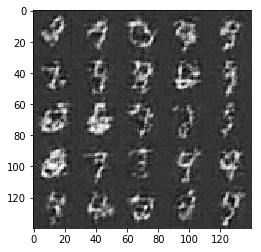

Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 1.8941
Epoch 1/2... Discriminator Loss: 0.5669... Generator Loss: 1.8143
Epoch 1/2... Discriminator Loss: 0.4061... Generator Loss: 2.7961
Epoch 1/2... Discriminator Loss: 0.4126... Generator Loss: 2.6940
Epoch 1/2... Discriminator Loss: 0.4798... Generator Loss: 2.1266


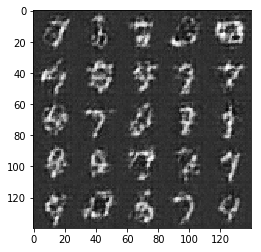

Epoch 1/2... Discriminator Loss: 0.5122... Generator Loss: 1.9728
Epoch 1/2... Discriminator Loss: 0.4155... Generator Loss: 2.6690
Epoch 1/2... Discriminator Loss: 0.4831... Generator Loss: 2.0659
Epoch 1/2... Discriminator Loss: 1.3329... Generator Loss: 0.5801
Epoch 1/2... Discriminator Loss: 0.5701... Generator Loss: 1.9518


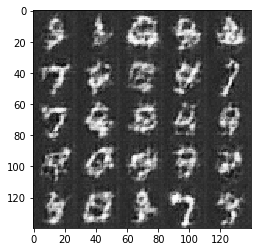

Epoch 1/2... Discriminator Loss: 0.9830... Generator Loss: 0.8503
Epoch 1/2... Discriminator Loss: 0.5485... Generator Loss: 1.8323
Epoch 1/2... Discriminator Loss: 0.6526... Generator Loss: 1.4435
Epoch 1/2... Discriminator Loss: 0.5449... Generator Loss: 1.8017
Epoch 1/2... Discriminator Loss: 0.5595... Generator Loss: 1.7186


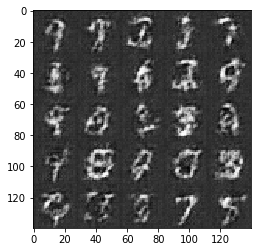

Epoch 1/2... Discriminator Loss: 0.7512... Generator Loss: 1.1652
Epoch 1/2... Discriminator Loss: 0.6027... Generator Loss: 1.6750
Epoch 1/2... Discriminator Loss: 0.5959... Generator Loss: 1.5678
Epoch 1/2... Discriminator Loss: 0.5270... Generator Loss: 1.8967
Epoch 1/2... Discriminator Loss: 1.0639... Generator Loss: 0.7940


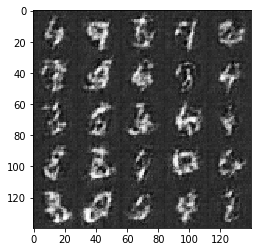

Epoch 1/2... Discriminator Loss: 0.7702... Generator Loss: 1.1597
Epoch 1/2... Discriminator Loss: 0.4859... Generator Loss: 2.0864
Epoch 1/2... Discriminator Loss: 0.5992... Generator Loss: 1.5994
Epoch 1/2... Discriminator Loss: 0.5629... Generator Loss: 1.7350
Epoch 1/2... Discriminator Loss: 0.5387... Generator Loss: 1.9561


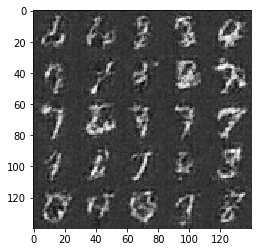

Epoch 1/2... Discriminator Loss: 0.4782... Generator Loss: 2.1795
Epoch 1/2... Discriminator Loss: 0.4782... Generator Loss: 2.1767
Epoch 1/2... Discriminator Loss: 0.5620... Generator Loss: 1.7047
Epoch 1/2... Discriminator Loss: 0.5799... Generator Loss: 1.6302
Epoch 1/2... Discriminator Loss: 0.9252... Generator Loss: 0.9077


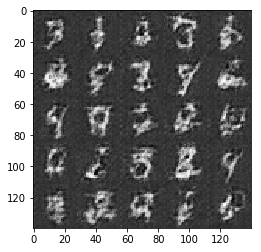

Epoch 1/2... Discriminator Loss: 0.5321... Generator Loss: 1.8132
Epoch 1/2... Discriminator Loss: 0.4849... Generator Loss: 2.1459
Epoch 1/2... Discriminator Loss: 0.4902... Generator Loss: 2.0322
Epoch 1/2... Discriminator Loss: 0.5998... Generator Loss: 1.5331
Epoch 1/2... Discriminator Loss: 0.5845... Generator Loss: 1.6515


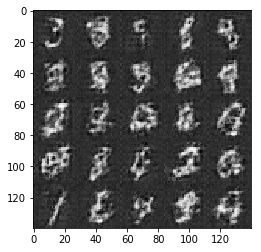

Epoch 1/2... Discriminator Loss: 0.4409... Generator Loss: 2.3817
Epoch 1/2... Discriminator Loss: 0.4458... Generator Loss: 2.3346
Epoch 1/2... Discriminator Loss: 0.4442... Generator Loss: 2.5264
Epoch 1/2... Discriminator Loss: 0.4366... Generator Loss: 2.4229
Epoch 1/2... Discriminator Loss: 0.5064... Generator Loss: 1.9071


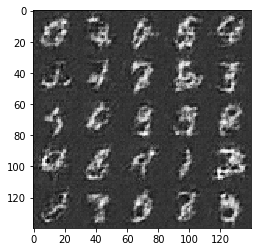

Epoch 1/2... Discriminator Loss: 0.4681... Generator Loss: 2.2129
Epoch 1/2... Discriminator Loss: 0.4088... Generator Loss: 2.8603
Epoch 1/2... Discriminator Loss: 0.4524... Generator Loss: 2.5272
Epoch 1/2... Discriminator Loss: 0.4228... Generator Loss: 2.6315
Epoch 1/2... Discriminator Loss: 0.4002... Generator Loss: 2.8416


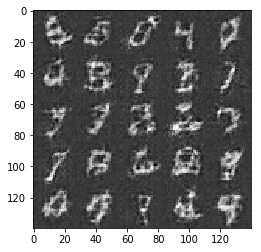

Epoch 1/2... Discriminator Loss: 0.8122... Generator Loss: 1.1408
Epoch 1/2... Discriminator Loss: 0.4721... Generator Loss: 2.1549
Epoch 1/2... Discriminator Loss: 0.4637... Generator Loss: 2.2468
Epoch 1/2... Discriminator Loss: 0.6637... Generator Loss: 1.5046
Epoch 1/2... Discriminator Loss: 0.7111... Generator Loss: 1.3043


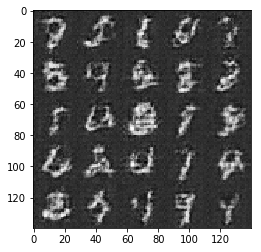

Epoch 1/2... Discriminator Loss: 0.3780... Generator Loss: 3.6263
Epoch 1/2... Discriminator Loss: 0.9007... Generator Loss: 1.3446
Epoch 1/2... Discriminator Loss: 0.5327... Generator Loss: 1.9324
Epoch 1/2... Discriminator Loss: 0.5576... Generator Loss: 1.7520
Epoch 1/2... Discriminator Loss: 0.9562... Generator Loss: 0.8478


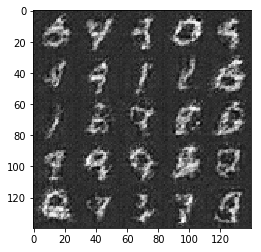

Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 1.1189
Epoch 1/2... Discriminator Loss: 0.6776... Generator Loss: 1.3468
Epoch 1/2... Discriminator Loss: 0.6156... Generator Loss: 1.4981
Epoch 1/2... Discriminator Loss: 0.7730... Generator Loss: 1.1333
Epoch 1/2... Discriminator Loss: 0.6010... Generator Loss: 1.6096


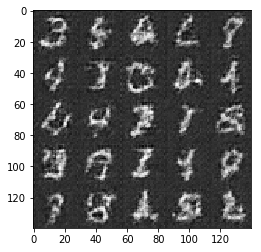

Epoch 1/2... Discriminator Loss: 1.8450... Generator Loss: 0.3626
Epoch 1/2... Discriminator Loss: 1.0710... Generator Loss: 0.7483
Epoch 1/2... Discriminator Loss: 0.5765... Generator Loss: 1.6647
Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 0.5137... Generator Loss: 1.9654


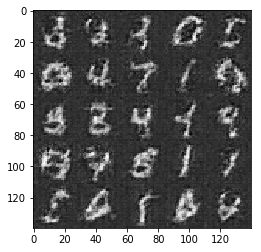

Epoch 1/2... Discriminator Loss: 0.6447... Generator Loss: 1.4091
Epoch 1/2... Discriminator Loss: 0.5108... Generator Loss: 2.0223
Epoch 1/2... Discriminator Loss: 0.5587... Generator Loss: 1.6911
Epoch 1/2... Discriminator Loss: 0.4304... Generator Loss: 2.5806
Epoch 1/2... Discriminator Loss: 0.5142... Generator Loss: 1.9029


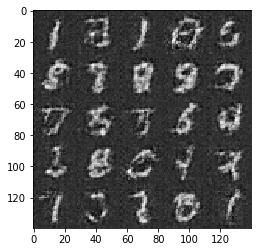

Epoch 1/2... Discriminator Loss: 0.5084... Generator Loss: 1.9264
Epoch 1/2... Discriminator Loss: 0.3964... Generator Loss: 2.8422
Epoch 1/2... Discriminator Loss: 0.6283... Generator Loss: 1.5456
Epoch 1/2... Discriminator Loss: 0.5210... Generator Loss: 1.9024
Epoch 1/2... Discriminator Loss: 0.4544... Generator Loss: 2.3219


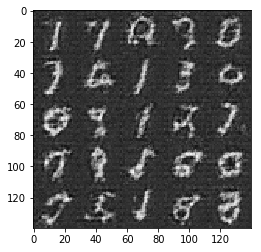

Epoch 1/2... Discriminator Loss: 0.4451... Generator Loss: 2.4491
Epoch 1/2... Discriminator Loss: 0.4001... Generator Loss: 2.7831
Epoch 1/2... Discriminator Loss: 0.4626... Generator Loss: 2.4205
Epoch 1/2... Discriminator Loss: 0.4597... Generator Loss: 2.2030
Epoch 1/2... Discriminator Loss: 0.3975... Generator Loss: 2.9996


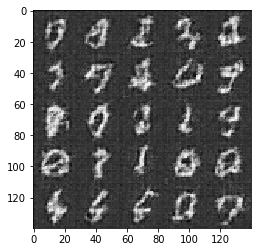

Epoch 1/2... Discriminator Loss: 0.4635... Generator Loss: 2.1951
Epoch 1/2... Discriminator Loss: 0.4719... Generator Loss: 2.2848
Epoch 1/2... Discriminator Loss: 0.6242... Generator Loss: 1.5790
Epoch 1/2... Discriminator Loss: 0.4114... Generator Loss: 2.7489
Epoch 1/2... Discriminator Loss: 0.5647... Generator Loss: 1.7049


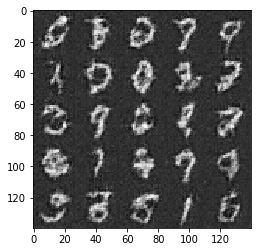

Epoch 1/2... Discriminator Loss: 0.4595... Generator Loss: 2.3717
Epoch 1/2... Discriminator Loss: 0.5340... Generator Loss: 1.7914
Epoch 1/2... Discriminator Loss: 0.4211... Generator Loss: 2.6138
Epoch 1/2... Discriminator Loss: 0.3764... Generator Loss: 3.1978
Epoch 1/2... Discriminator Loss: 0.4129... Generator Loss: 2.6946


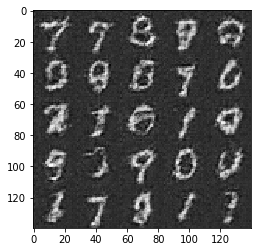

Epoch 1/2... Discriminator Loss: 0.4316... Generator Loss: 2.7454
Epoch 1/2... Discriminator Loss: 0.5761... Generator Loss: 1.7013
Epoch 2/2... Discriminator Loss: 0.3999... Generator Loss: 2.8770
Epoch 2/2... Discriminator Loss: 0.4316... Generator Loss: 2.4277
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 0.7565


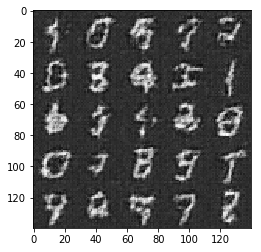

Epoch 2/2... Discriminator Loss: 1.0185... Generator Loss: 0.8137
Epoch 2/2... Discriminator Loss: 0.6108... Generator Loss: 1.6484
Epoch 2/2... Discriminator Loss: 0.5524... Generator Loss: 1.7821
Epoch 2/2... Discriminator Loss: 0.7358... Generator Loss: 1.2561
Epoch 2/2... Discriminator Loss: 0.6699... Generator Loss: 1.3749


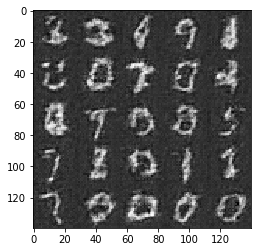

Epoch 2/2... Discriminator Loss: 0.6273... Generator Loss: 1.4542
Epoch 2/2... Discriminator Loss: 0.5744... Generator Loss: 1.6465
Epoch 2/2... Discriminator Loss: 0.6415... Generator Loss: 1.4233
Epoch 2/2... Discriminator Loss: 0.5743... Generator Loss: 1.6545
Epoch 2/2... Discriminator Loss: 0.5026... Generator Loss: 1.9288


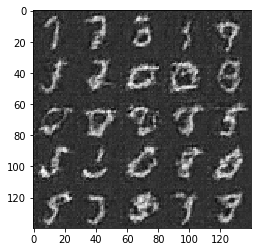

Epoch 2/2... Discriminator Loss: 0.6604... Generator Loss: 1.3984
Epoch 2/2... Discriminator Loss: 0.3993... Generator Loss: 2.8260
Epoch 2/2... Discriminator Loss: 0.4893... Generator Loss: 2.1095
Epoch 2/2... Discriminator Loss: 0.3655... Generator Loss: 3.5002
Epoch 2/2... Discriminator Loss: 0.6629... Generator Loss: 1.3538


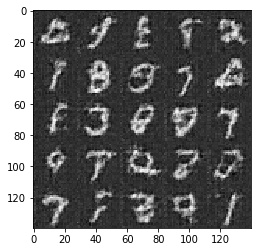

Epoch 2/2... Discriminator Loss: 0.4124... Generator Loss: 2.6301
Epoch 2/2... Discriminator Loss: 0.4498... Generator Loss: 2.3543
Epoch 2/2... Discriminator Loss: 0.3920... Generator Loss: 3.0743
Epoch 2/2... Discriminator Loss: 0.4158... Generator Loss: 2.7241
Epoch 2/2... Discriminator Loss: 0.3933... Generator Loss: 2.9830


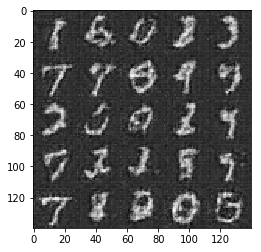

Epoch 2/2... Discriminator Loss: 0.3861... Generator Loss: 3.3936
Epoch 2/2... Discriminator Loss: 0.4500... Generator Loss: 2.3598
Epoch 2/2... Discriminator Loss: 0.4591... Generator Loss: 2.2250
Epoch 2/2... Discriminator Loss: 0.3613... Generator Loss: 3.5787
Epoch 2/2... Discriminator Loss: 0.4047... Generator Loss: 2.6873


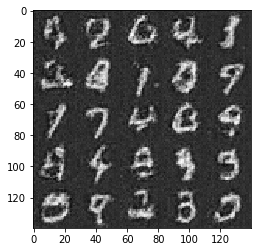

Epoch 2/2... Discriminator Loss: 0.5345... Generator Loss: 1.8277
Epoch 2/2... Discriminator Loss: 0.8749... Generator Loss: 1.4299
Epoch 2/2... Discriminator Loss: 0.6456... Generator Loss: 1.5797
Epoch 2/2... Discriminator Loss: 0.4927... Generator Loss: 2.0381
Epoch 2/2... Discriminator Loss: 0.7018... Generator Loss: 1.2701


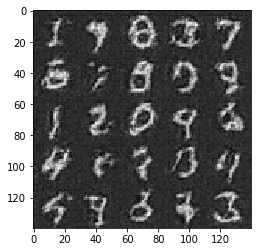

Epoch 2/2... Discriminator Loss: 0.7539... Generator Loss: 1.1570
Epoch 2/2... Discriminator Loss: 0.4889... Generator Loss: 2.0637
Epoch 2/2... Discriminator Loss: 0.6175... Generator Loss: 1.5266
Epoch 2/2... Discriminator Loss: 0.4256... Generator Loss: 2.5537
Epoch 2/2... Discriminator Loss: 0.3846... Generator Loss: 3.0520


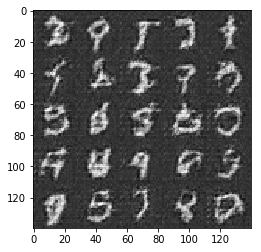

Epoch 2/2... Discriminator Loss: 0.4190... Generator Loss: 2.7262
Epoch 2/2... Discriminator Loss: 0.5284... Generator Loss: 1.8447
Epoch 2/2... Discriminator Loss: 0.6298... Generator Loss: 1.5492
Epoch 2/2... Discriminator Loss: 0.4032... Generator Loss: 2.7790
Epoch 2/2... Discriminator Loss: 2.7807... Generator Loss: 0.1642


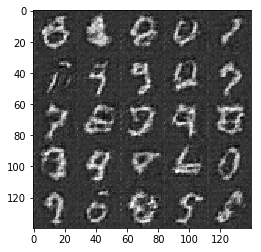

Epoch 2/2... Discriminator Loss: 0.8893... Generator Loss: 0.9527
Epoch 2/2... Discriminator Loss: 0.5659... Generator Loss: 2.0768
Epoch 2/2... Discriminator Loss: 0.5745... Generator Loss: 1.7699
Epoch 2/2... Discriminator Loss: 0.4807... Generator Loss: 2.3197


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 128
z_dim = 200
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.